<a href="https://colab.research.google.com/github/prab-tri/demo/blob/master/Python_ICP09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ICP09 Python Deep Learning**

Topics - Image classisifcation of MNIST data using Keras CNN network.

Created By  - Prabhanjan Trivedi

In [1]:
#importing all important libraries
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
#Loading the data -- test and training image and their respective lables 
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [3]:
#shape of traininig image
print(train_images.shape[1:])

(28, 28)


It shows image has 28 rows and 28 columns.

In [4]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)

784


In [5]:
#Reshaping the training and test image vectors  
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [6]:
#printing shape of training data 
train_data.shape

(60000, 784)

We have 60K image and each has 784 columns (Pixels are stsored in 1-D after reshaping).

In [7]:
#convert data(Pixel value) to float 
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [8]:
#scaling the pixel value to range between 0 to 1.
train_data /=255.0
test_data /=255.0

In [9]:
#change the labels from integer to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

We can see that we have 10 labels for each 60K image. If an image belong to category 1, column 1 will ahve value 1 and rest column would be 0. This is how hot encoding is done.


In [10]:
#shape of labels for training data
train_labels_one_hot.shape

(60000, 10)

A model is created using:


*   Two Dense layers of 512 neurons and activation function as relu.
*   A final dense layer of 10 neurons (We have 10 lables to predict) and activation function as softmax.



In [11]:
#creating network / Model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
#compiling and trainig the model with training data and test data as validation data
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 6s 26ms/step - loss: 0.2708 - accuracy: 0.9164 - val_loss: 0.1465 - val_accuracy: 0.9532
Epoch 2/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0916 - accuracy: 0.9713 - val_loss: 0.1405 - val_accuracy: 0.9540
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0581 - accuracy: 0.9816 - val_loss: 0.0796 - val_accuracy: 0.9763
Epoch 4/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0751 - val_accuracy: 0.9774
Epoch 5/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.0722 - val_accuracy: 0.9805
Epoch 6/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0745 - val_accuracy: 0.9800
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0736 - val_accuracy: 0.9814

**In class programming:**

**1. using the history object in the source code, plot the loss and accuracy for both training data and validation data.** 

In [13]:
#history object is data structure of dictionary type. It has four keys which helps to plot the graph
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

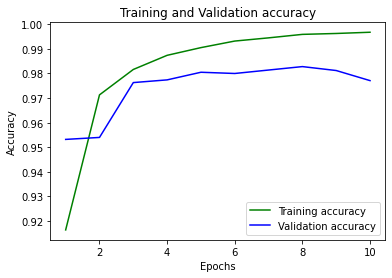

In [14]:
#plotting accuracy between training and validation data
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
#as we have set epochs as 10 in model fitting
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can see that as epochs increases , accuracy of model increases. On comparing training and validation data, we can see that model is more accurate on training data compared to validation data.

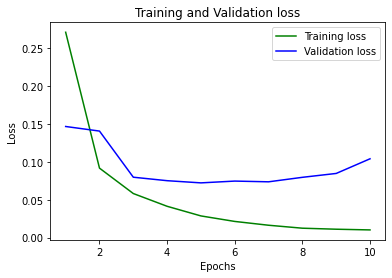

In [15]:
#plotting loss between training and validation data
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#as we have set epochs as 10 in model fitting
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We can see that loss is decreasing as epochs run more on model. Loss is more on validation data compared to training data.

**2. plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that
single image in the test data.**

In [16]:
#We have 10K image in test data.
test_images.shape

(10000, 28, 28)

In [17]:
'''We can plot any image from given test data.
As we have 10K images and we are passing index to this function.
Valid index could vary from 0 to 9999 to this function.
''' 
def predict_image(ind):
  #plotting image
  print('Here is the image')
  plt.imshow(test_images[ind])
  plt.title('Image from test data')
  plt.show()

  #This is label given in test data.
  test_val = test_labels[ind]
  print('Label of given image in the data is {}'.format(test_val))

  #prediction through model by passing image
  img = test_data[ind]
  #changing dimension of image for prediction
  img = np.expand_dims(img, axis = 0)
  predicted_label = model.predict(img)
  predicted_val  = np.argmax(predicted_label)
  print('Predicted value from the model for given image is {}'.format(predicted_val))
  print('Is prediction correct ?  {} '.format(predicted_val == test_val))
    


Here is the image


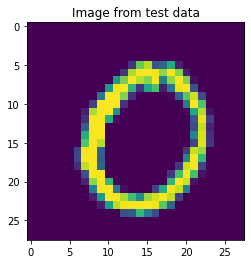

Label of given image in the data is 0
Predicted value from the model for given image is 0
Is prediction correct ?  True 


In [18]:
#predicting the image by calling above function
predict_image(101)

**3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to
 tanh or sigmoid and see what happens.**

A model is created using:
*   Three Dense layers of 128,256 and 512 neurons and activation function as tanh, sigmoid and tanh respectively.
*   A final dense layer of 10 neurons (We have 10 lables to predict) and activation function as softmax.


In [19]:
#creating a different model as per stated above
model1 = Sequential()
model1.add(Dense(128, activation='tanh', input_shape=(dimData,)))
model1.add(Dense(256, activation='sigmoid'))
model1.add(Dense(512, activation='tanh'))
model1.add(Dense(10, activation='softmax'))


In [20]:
#compiling and trainig the model with training data and test data as validation data
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 3s 15ms/step - loss: 0.5912 - accuracy: 0.8173 - val_loss: 0.2924 - val_accuracy: 0.9148
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.2421 - accuracy: 0.9267 - val_loss: 0.2198 - val_accuracy: 0.9301
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1711 - accuracy: 0.9480 - val_loss: 0.2853 - val_accuracy: 0.9093
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1302 - accuracy: 0.9600 - val_loss: 0.1248 - val_accuracy: 0.9621
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1028 - accuracy: 0.9683 - val_loss: 0.1112 - val_accuracy: 0.9666
Epoch 6/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0846 - accuracy: 0.9733 - val_loss: 0.1047 - val_accuracy: 0.9676
Epoch 7/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0700 - accuracy: 0.9777 - val_loss: 0.0903 - val_accuracy: 0.9730

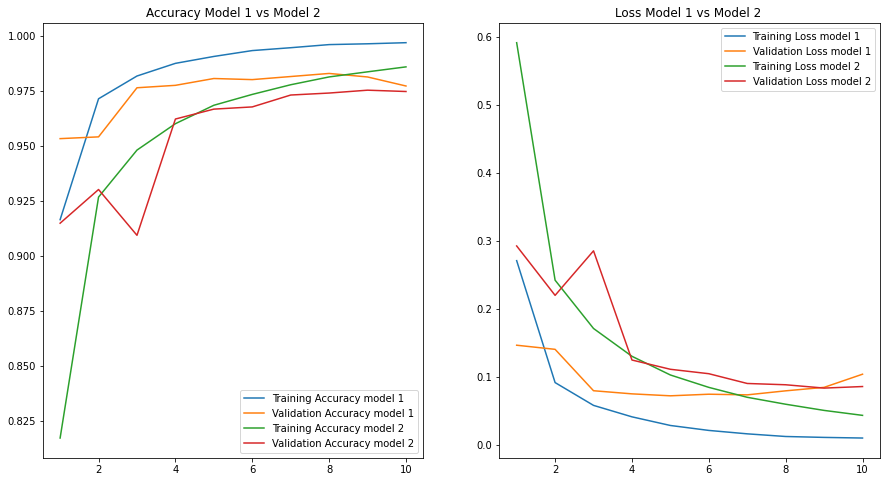

In [21]:
#plotting accuracy and loss of both models
#First model data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Second model data
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

#as we have set epochs as 10 in model fitting
epochs_range = range(1,11)

plt.figure(figsize=(15, 8))
#model 1 plotting
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy model 1')
plt.plot(epochs_range, val_acc, label='Validation Accuracy model 1')
plt.plot(epochs_range, acc1, label='Training Accuracy model 2')
plt.plot(epochs_range, val_acc1, label='Validation Accuracy model 2')
plt.legend(loc='lower right')
plt.title('Accuracy Model 1 vs Model 2')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss model 1')
plt.plot(epochs_range, val_loss, label='Validation Loss model 1')
plt.plot(epochs_range, loss1, label='Training Loss model 2')
plt.plot(epochs_range, val_loss1, label='Validation Loss model 2')
plt.legend(loc='upper right')
plt.title('Loss Model 1 vs Model 2 ')
plt.show()


**4. Run the same code without scaling the images, how the accuracy changes?**

In [22]:
#creating third network / Model to train unscaled data
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(dimData,)))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [23]:
#Reshaping the training and test image vectors  
train_data2 = train_images.reshape(train_images.shape[0],dimData)
test_data2 = test_images.reshape(test_images.shape[0],dimData)

In [25]:
#compiling and trainig the model with training data and test data as validation data 
#datas are unsacled in this case
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_data2, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data2, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 6s 27ms/step - loss: 3.7384 - accuracy: 0.9868 - val_loss: 0.1382 - val_accuracy: 0.9738
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 1.4448 - accuracy: 0.9886 - val_loss: 0.3243 - val_accuracy: 0.9773
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: 0.7898 - accuracy: 0.9889 - val_loss: 0.5778 - val_accuracy: 0.9718
Epoch 4/10
235/235 [==============================] - 6s 26ms/step - loss: 0.5236 - accuracy: 0.9892 - val_loss: 0.6854 - val_accuracy: 0.9632
Epoch 5/10
235/235 [==============================] - 6s 26ms/step - loss: 0.4335 - accuracy: 0.9897 - val_loss: 0.8873 - val_accuracy: 0.9648
Epoch 6/10
235/235 [==============================] - 6s 26ms/step - loss: 0.2892 - accuracy: 0.9904 - val_loss: 0.8825 - val_accuracy: 0.9686
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: 0.2473 - accuracy: 0.9911 - val_loss: 0.9939 - val_accuracy: 0.9665

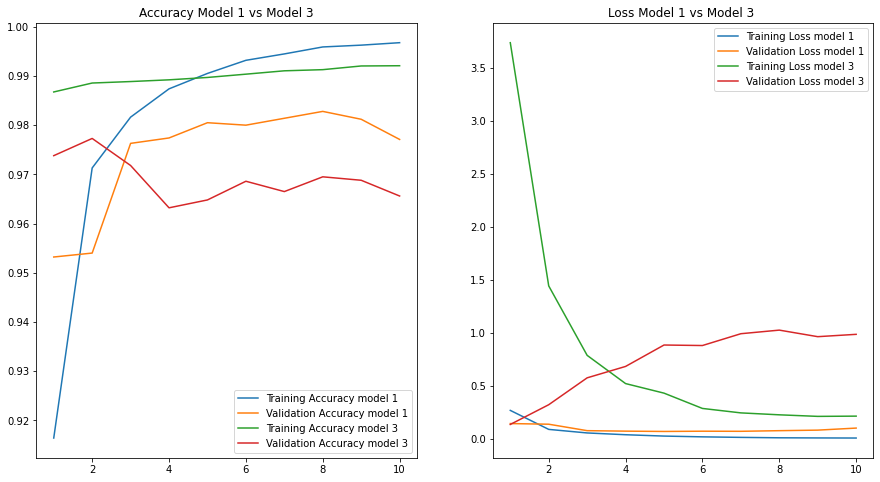

In [27]:
#plotting accuracy and loss of both models
#First model data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Second model data
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

#as we have set epochs as 10 in model fitting
epochs_range = range(1,11)

plt.figure(figsize=(15, 8))
#model 1 plotting
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy model 1')
plt.plot(epochs_range, val_acc, label='Validation Accuracy model 1')
plt.plot(epochs_range, acc2, label='Training Accuracy model 3')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy model 3')
plt.legend(loc='lower right')
plt.title('Accuracy Model 1 vs Model 3')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss model 1')
plt.plot(epochs_range, val_loss, label='Validation Loss model 1')
plt.plot(epochs_range, loss2, label='Training Loss model 3')
plt.plot(epochs_range, val_loss2, label='Validation Loss model 3')
plt.legend(loc='upper right')
plt.title('Loss Model 1 vs Model 3 ')
plt.show()
